In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [15]:
df = pd.read_csv(r'/Users/bendavid/Desktop/Data/sqf-2019.csv')

In [16]:
# Drop nans
borough = df['STOP_LOCATION_BORO_NAME'].dropna() 

In [17]:
borough.value_counts(sum)

BROOKLYN         0.320306
MANHATTAN        0.276692
BRONX            0.183075
QUEENS           0.181737
STATEN ISLAND    0.038190
Name: STOP_LOCATION_BORO_NAME, dtype: float64

In [18]:
#count of stop&frisk by month 

month = df["MONTH2"]
month.value_counts()

April        1364
May          1358
March        1313
June         1267
July         1221
August       1095
January      1050
September    1033
October      1026
February      952
November      925
December      855
Name: MONTH2, dtype: int64

In [19]:
# Create a table 
table = pd.crosstab(index=borough, columns=month) 

# Reorder the values 
table = table.reindex(['BROOKLYN', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN ISLAND'])
table = table[['January', 'February', 'March', 'April', 'May', 'June', 'July','August',
                         'September','October','November','December']]
table

MONTH2,January,February,March,April,May,June,July,August,September,October,November,December
STOP_LOCATION_BORO_NAME,,,,,,,,,,,,
BROOKLYN,344,276,461,500,463,387,387,308,327,365,248,245
MANHATTAN,282,274,379,374,388,427,332,287,242,254,255,230
QUEENS,162,175,223,235,215,198,216,251,224,207,182,158
BRONX,214,169,199,216,249,204,254,219,192,168,196,184
STATEN ISLAND,48,58,51,39,43,51,32,30,48,32,44,38


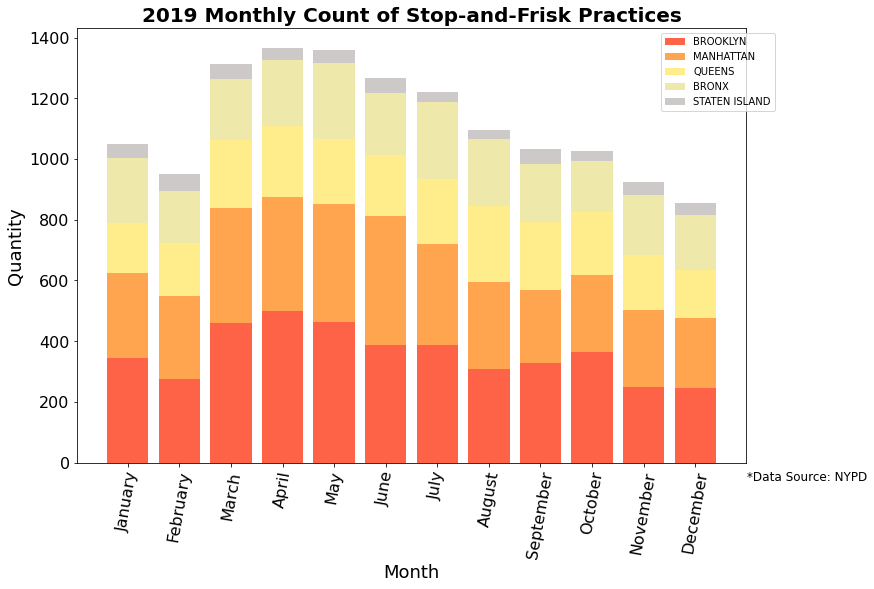

In [22]:
# Plot a stacked bar chart 

label = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August',
                         'September','October','November','December']

y_value1 = table.loc['BROOKLYN']
y_value2 = table.loc['MANHATTAN']
y_value3 = table.loc['QUEENS']
y_value4 = table.loc['BRONX']
y_value5 = table.loc['STATEN ISLAND']

fig, axs = plt.subplots(figsize=(12,8)) # Change the figure size        
p1 = axs.bar(label, y_value1, color = '#FF6347')     
p2 = axs.bar(label, y_value2, bottom=y_value1, color = '#FFA54F')
p3 = axs.bar(label, y_value3, bottom=y_value1+y_value2, color = '#FFEC8B')
p4 = axs.bar(label, y_value4, bottom=y_value1+y_value2+y_value3, color = '#EEE8AA')
p5 = axs.bar(label, y_value5, bottom=y_value1+y_value2+y_value3+
            y_value4, color = '#CDC9C9')

axs.set_title("2019 Monthly Count of Stop-and-Frisk Practices", 
              fontsize=20, fontweight="bold")   
axs.set_xlabel("Month", fontsize=18)
axs.set_ylabel("Quantity", fontsize=18)
axs.tick_params(labelsize=16)  
plt.xticks(rotation=80)
axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),
           (table.index),
          bbox_to_anchor=(1.05, 1))

plt.text(12, -60, "*Data Source: NYPD", fontsize=12)

plt.show() 